In [1]:
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
from utils import compute_fft
from scipy.special import hermite
from scipy.special import factorial

In [2]:
B = 500 #assumes depth is 1
a_mt = 3.57 / 0.53
delta_mt = 4.7 / 3.5

eps = (1 + a_mt)
e_step = jnp.sqrt(2 / B * (1 + a_mt / delta_mt**2))
n = int(eps / e_step)
n, B, eps

(56, 500, 7.735849056603773)

In [3]:
dx_crit = jnp.pi * jnp.sqrt(1 / (B * eps)) 

In [4]:
padding = 10
coord_grid = jnp.arange(0 - padding, 0 + padding, dx_crit)
N_x = coord_grid.shape[0]
N_x, dx_crit

(396, Array(0.0505139, dtype=float32, weak_type=True))

In [5]:
momentum_span = 2 * jnp.pi / dx_crit
momentum_grid = jnp.linspace(-momentum_span / 2, +momentum_span / 2, N_x)
momentum_step = (momentum_grid[1] - momentum_grid[0]).real
momentum_step

Array(0.31489944, dtype=float32)

In [7]:
def state_k(k, grid, energy_step):
    hermite_poly = hermite(k)
    transformed = grid.real / (2 / B / (1 + (1 + a_mt / delta_mt**2))) ** .25
    psi_n = hermite_poly(transformed) * jnp.exp(-0.5 * transformed**2) 
    eps_n = (k + 1/2) * energy_step
    return eps_n, psi_n

In [8]:
eig = [state_k(k, coord_grid, e_step) for k in range(n)]

/home/kirill/miniconda3/envs/myenv/lib/python3.12/site-packages/jax/_src/numpy/ufunc_api.py:179: RuntimeWarning: overflow encountered in cast
  return call(*args)


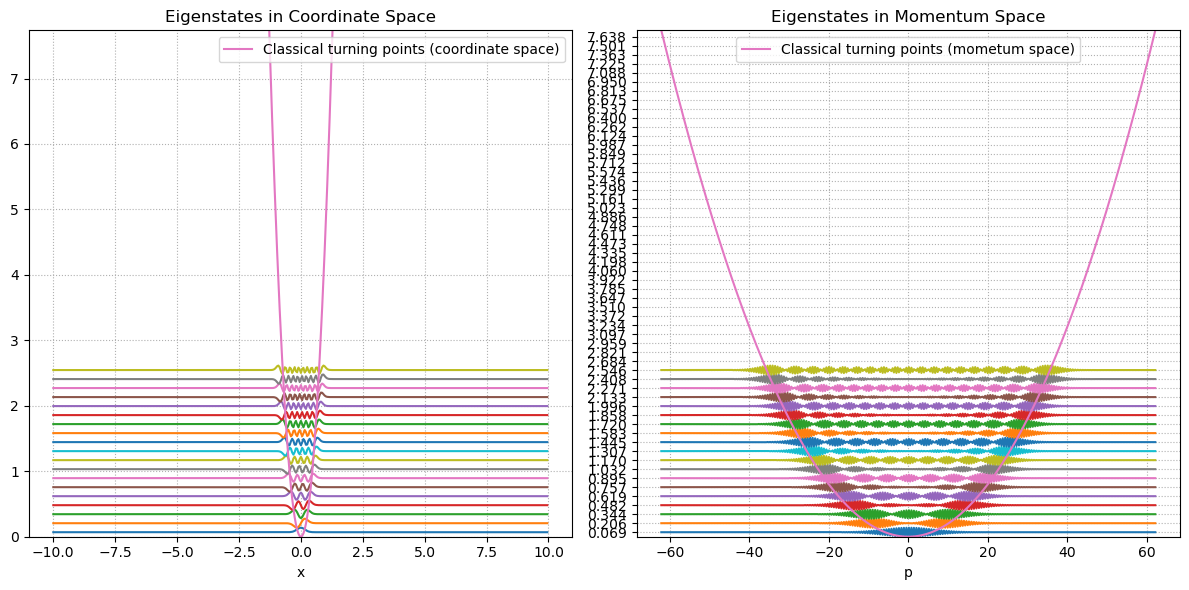

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for k in range(n):
   
    eps, psi = eig[k]

    # Координатное пространство
    psi_coord = psi.real
    psi_coord = psi_coord / psi_coord.max() * e_step / 2
    axes[0].plot(coord_grid, psi_coord + eps)

    # Импульсное пространство
    psi_momentum = compute_fft(psi).real
    psi_momentum = psi_momentum / psi_momentum.max() * e_step / 2
    axes[1].plot(momentum_grid, psi_momentum + eps)

axes[0].plot(coord_grid, (1 + a_mt / delta_mt**2) * coord_grid**2, label = 'Classical turning points (coordinate space)')
axes[1].plot(momentum_grid, momentum_grid**2 / B, label = 'Classical turning points (mometum space)')

axes[0].grid(ls=':')
axes[0].set_xlabel("x")
axes[0].set_title("Eigenstates in Coordinate Space")
axes[0].legend()
axes[0].set_ylim(0,1+a_mt)

# Настройки первого графика
axes[1].set_yticks(jnp.arange(e_step/2, 1 + a_mt, e_step))
axes[1].grid(ls=':')
axes[1].set_xlabel("p")
axes[1].set_title("Eigenstates in Momentum Space")
axes[1].legend()
axes[1].set_ylim(0,1+a_mt)

plt.tight_layout()
plt.show()
